In [1]:
# START
# Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Importing the dataset

In [4]:
customers = pd.read_csv('Ecommerce Customers.csv')

In [5]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
# Creating a jointplot to compare the Time on Website and Yearly Amount Spent columns

In [8]:
sns.set_style('whitegrid')

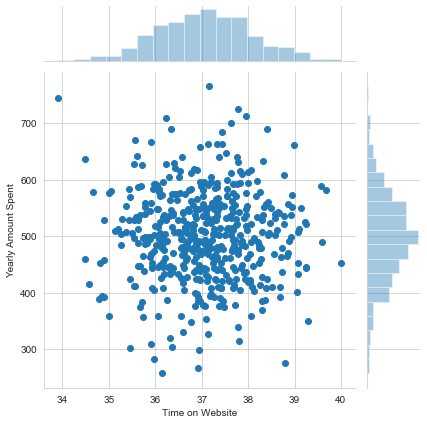

In [9]:
sns.jointplot(data=customers, x='Time on Website', y='Yearly Amount Spent')

In [10]:
# Same as top but with Time on App column

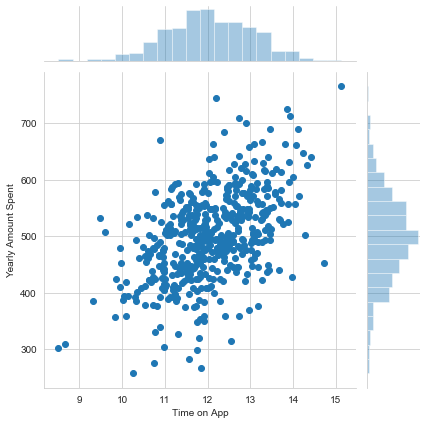

In [11]:
sns.jointplot(data=customers, x='Time on App', y='Yearly Amount Spent')

In [12]:
# Creating hex bin plot to compare Time on App and Length of Membership

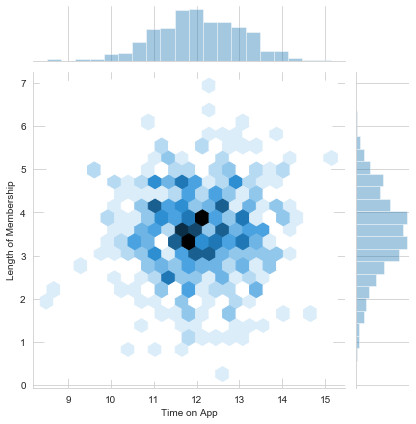

In [13]:
sns.jointplot(data=customers, x='Time on App', y='Length of Membership', kind='hex')

In [14]:
# Exploring the relationships across the entire dataset using pairplot

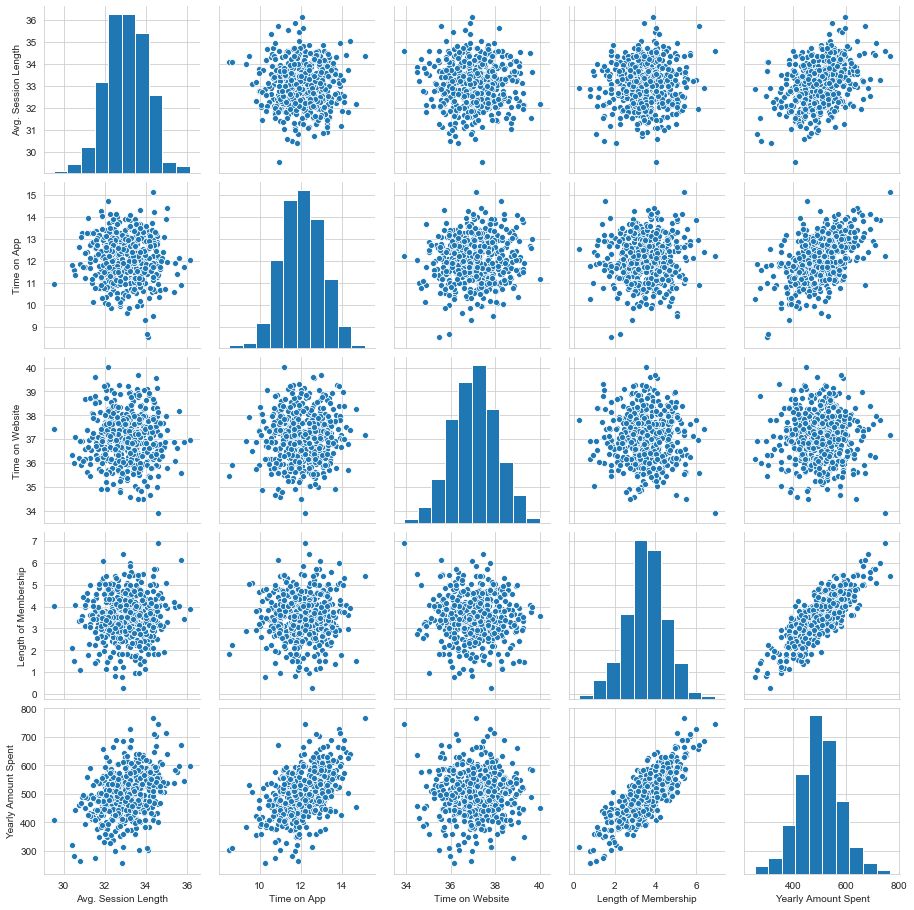

In [15]:
sns.pairplot(customers)

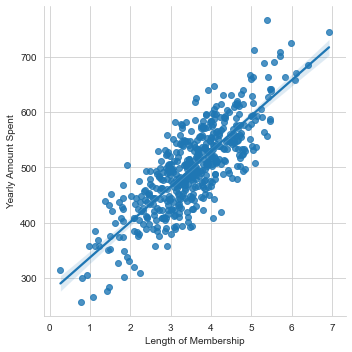

In [16]:
sns.lmplot(data=customers, x='Length of Membership', y='Yearly Amount Spent')

In [17]:
# Splitting the data into training set and test set

In [18]:
X = customers.iloc[:, 3:7]
y = customers.iloc[:, 7]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [21]:
# Training the model

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
regressor = LinearRegression()

In [24]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
regressor.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [26]:
# Predicting test data

In [27]:
y_pred = regressor.predict(X_test)

In [28]:
y_pred

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

In [29]:
# Creating the scatterplot of the y_test and y_pred

Text(0, 0.5, 'Y Pred (Predicted Values)')

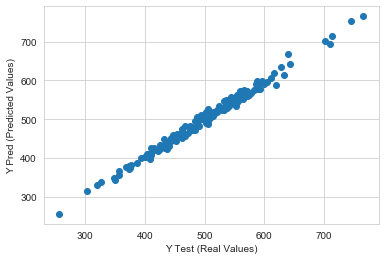

In [30]:
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test (Real Values)')
plt.ylabel('Y Pred (Predicted Values)')

In [31]:
# Evaluating the Model

In [32]:
from sklearn import metrics

In [33]:
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('EVC: ', metrics.explained_variance_score(y_test, y_pred))

MAE:  7.228148653430838
MSE:  79.81305165097461
RMSE:  8.933815066978642
EVC:  0.9890771231889606


In [34]:
# Plotting the histogram of residuals

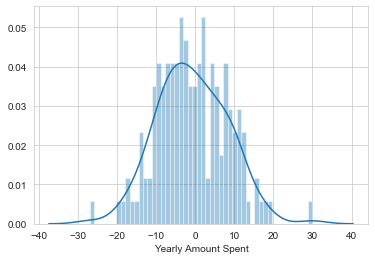

In [35]:
sns.distplot((y_test-y_pred), bins=50)

In [36]:
# Conclusion

In [37]:
cdf = pd.DataFrame(regressor.coef_, X.columns, columns=['Coeffecient'])

In [38]:
cdf

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [39]:
# FINISH